In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/usgs_data_small.csv')
df.dropna(inplace=True)
df.head()

,time,longitude,latitude,depth,mag
0,1940-01-06 20:04:35.170000,25.814000,35.373000,15.0,5.84
2,1940-01-06 09:15:39.210000,151.498000,45.077000,25.0,6.07
3,1940-01-05 09:42:55.570000,-116.367333,33.173167,6.0,3.42
4,1940-01-05 07:20:50.460000,-119.442000,32.929333,6.0,3.97
5,1940-01-04 21:44:55.390000,37.926000,40.415000,15.0,5.51


In [3]:
df["time_new"] = df["time"].apply(lambda x: x[:7])
df

,time,longitude,latitude,depth,mag,time_new
0,1940-01-06 20:04:35.170000,25.814000,35.373000,15.00,5.84,1940-01
2,1940-01-06 09:15:39.210000,151.498000,45.077000,25.00,6.07,1940-01
3,1940-01-05 09:42:55.570000,-116.367333,33.173167,6.00,3.42,1940-01
4,1940-01-05 07:20:50.460000,-119.442000,32.929333,6.00,3.97,1940-01
5,1940-01-04 21:44:55.390000,37.926000,40.415000,15.00,5.51,1940-01
...,...,...,...,...,...,...
4329143,2023-09-24 02:20:39.520000,-117.314167,34.071333,16.11,1.09,2023-09
4329144,2023-09-24 02:11:22.160000,-155.259000,58.195167,2.55,0.14,2023-09
4329145,2023-09-24 02:10:46.071000,-119.668800,40.223400,8.40,0.70,2023-09
4329146,2023-09-24 02:06:35.040000,-123.223333,39.279500,4.43,1.91,2023-09


In [4]:
time_cut = "1973-01"
SPLIT_DATE_TRAIN = "2020-01-01"
df = df[df["time_new"] > time_cut]

In [5]:
df["time"].min(), df["time"].max()

('1973-02-01 01:33:03.700000', '2023-10-01 01:54:00.107000')

In [6]:
GEO_SPLIT = 1

In [7]:
df["latitude_disc"] = (df["latitude"] // GEO_SPLIT * GEO_SPLIT).astype(int)
df["longitude_disc"] = (df["longitude"] // GEO_SPLIT * GEO_SPLIT).astype(int)
df["pos"] = df["latitude_disc"].astype(str) + "_" + df["longitude_disc"].astype(str)
df["time"] = pd.to_datetime(df["time"], format="mixed")

In [22]:
df["time"].quantile(0.8513)

Timestamp('2020-01-01 03:02:53.998029824')

In [31]:
df["time"].quantile(0.9734)

Timestamp('2023-01-01 16:20:18.851394048')

In [9]:
def filter_regions(df: pd.DataFrame, threshold: int) -> pd.DataFrame:
    df_f = df[df["time"] <= SPLIT_DATE_TRAIN]
    df_agg = df_f.groupby(["pos"]).agg({"mag": "count"}).reset_index()
    tmp = df_agg.loc[df_agg["mag"] >= threshold, "pos"].values
    df = df[df["pos"].isin(tmp)]
    return df

In [10]:
n = 40

In [11]:
counts1 = []
counts2 = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["pos"]).count().reset_index()
    counts1.append(len(df_agg))
    counts2.append(len(df_filter))

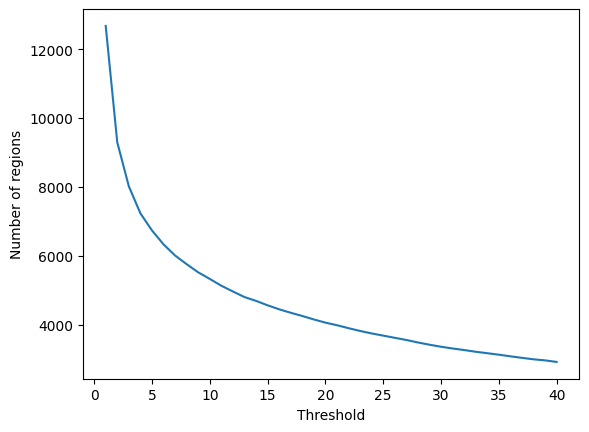

In [12]:
# plot counts
plt.plot(np.linspace(1, n, n), counts1)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

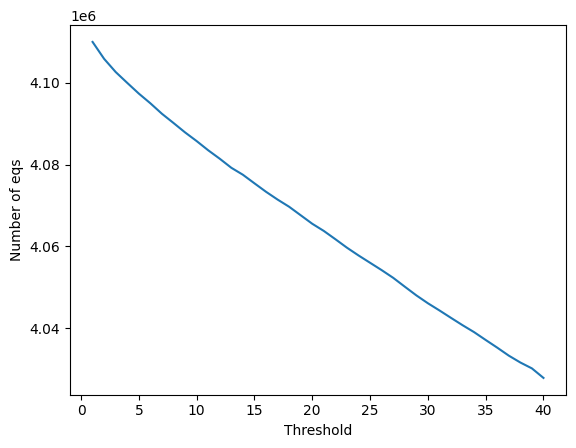

In [13]:
# plot counts
plt.plot(np.linspace(1, n, n), counts2)
plt.xlabel("Threshold")
plt.ylabel("Number of eqs")
plt.show()

In [14]:
n = 750

In [15]:
counts1 = []
counts2 = []
for th in np.linspace(1, n+1, n // 5 + 1):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["pos"]).count().reset_index()
    counts1.append(len(df_agg))
    counts2.append(len(df_filter))

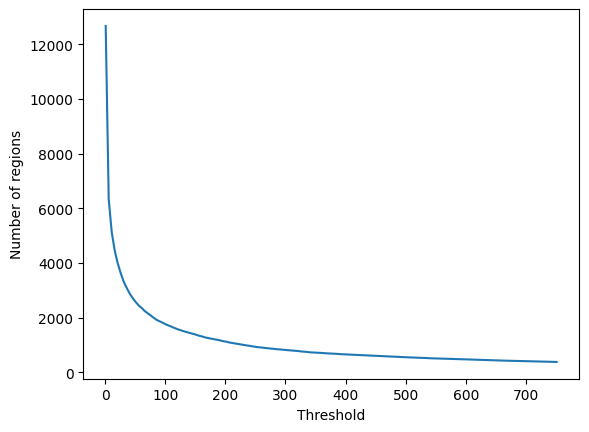

In [16]:
# plot counts
plt.plot(np.linspace(1, n+1, n // 5 + 1), counts1)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

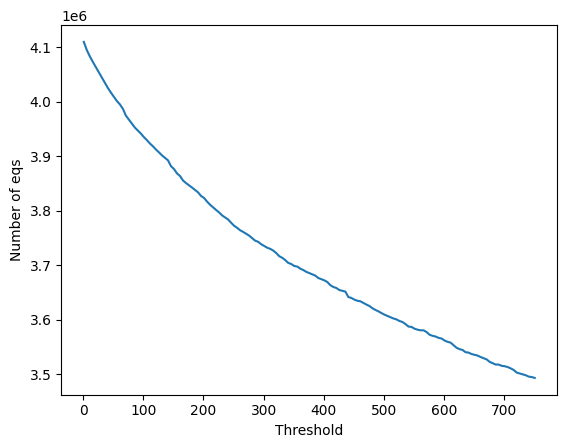

In [17]:
# plot counts
plt.plot(np.linspace(1, n+1, n // 5 + 1), counts2)
plt.xlabel("Threshold")
plt.ylabel("Number of eqs")
plt.show()